In [1]:
#install nfl_data_py module
!pip install nfl_data_py

In [2]:
#import modules
import nfl_data_py as nfl
import pandas as pd
import seaborn as sns 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [3]:
#import dataframes
pbp_2021 = nfl.import_pbp_data([2021])
pbp_2022 = nfl.import_pbp_data([2022])
schedule_2021 = nfl.import_schedules([2021])
schedule_2022 = nfl.import_schedules([2022])


2021 done.
Downcasting floats.
2022 done.
Downcasting floats.


In [4]:
#clean the pbp data
pbp_2021 = pbp_2021[(pbp_2021['play_type'] != 'qb_kneel') & (pbp_2021['play_type'] != 'qb_spike') & (pbp_2021['play_type'] != 'no_play')].dropna(subset=['play_type'])
pbp_2022 = pbp_2022[(pbp_2022['play_type'] != 'qb_kneel') & (pbp_2022['play_type'] != 'qb_spike') & (pbp_2022['play_type'] != 'no_play')].dropna(subset=['play_type'])
pbp_2022

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
1,43.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,None,None,NaN,None,NaN,47969;53059;42500;46279;53575;48364;46253;5460...,00-0036157;00-0035202;00-0037984;00-0029597;00...,00-0035537;00-0032134;00-0034419;00-0036500;00...,11,11
2,68.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
3,89.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;42371;53443;42500;44999;43433;3309...,00-0036924;00-0032466;00-0032234;00-0036979;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
4,115.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SINGLEBACK,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
5,136.0,2022_01_BAL_NYJ,2022091107,NYJ,BAL,REG,1,NYJ,home,BAL,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",4.0,53536;43586;53443;42371;42500;44999;43433;3309...,00-0036924;00-0032466;00-0036979;00-0032234;00...,00-0033294;00-0026190;00-0032574;00-0028278;00...,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50134,3876.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,PHI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",5.0,46243;48516;46213;47974;43367;46152;44874;4001...,,,0,0
50137,3947.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,PHI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",6.0,"3 DL, 3 LB, 5 DB",NaN,46243;48516;47974;43367;46152;44874;40011;4618...,,,0,0
50143,4024.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,KC,away,PHI,...,None,None,NaN,None,NaN,40994;46152;52618;54026;54478;53552;53492;5454...,,,0,0
50144,4050.0,2022_22_KC_PHI,2023021200,PHI,KC,POST,22,PHI,home,KC,...,None,None,NaN,None,NaN,48259;54724;54568;54600;54026;53579;45102;4251...,,,0,0


In [5]:
##prepare the epa/play data
epa_per_play_2021 = (pbp_2021.groupby('posteam')['epa'].mean() - pbp_2021.groupby('defteam')['epa'].mean())
epa_per_play_2022 = (pbp_2022.groupby('posteam')['epa'].mean() - pbp_2022.groupby('defteam')['epa'].mean())
epa_per_play_2021 = epa_per_play_2021.reset_index().rename(columns={'posteam':'team'}).set_index('team')
epa_per_play_2022 = epa_per_play_2022.reset_index().rename(columns={'posteam':'team'}).set_index('team')
epa_per_play_2022



,epa
team,
ARI,-0.103859
ATL,-0.048023
BAL,0.039989
BUF,0.149218
CAR,-0.005689
CHI,-0.126812
CIN,0.095954
CLE,-0.003014
DAL,0.097539


In [6]:
##prepare the win data(how many games each team won during the season)
#2021 season
schedule_2021['away_win'] = schedule_2021.apply(lambda row : 0 if row['result']>0 else 1, axis=1)
schedule_2021['home_win'] = schedule_2021.apply(lambda row : 1 if row['result']>0 else 0, axis=1)
home_wins = schedule_2021.groupby('home_team')['home_win'].sum()
away_wins = schedule_2021.groupby('away_team')['away_win'].sum()
total_wins_2021 = (home_wins + away_wins).reset_index().rename(columns={'home_team':'team', 0:'wins'}).set_index('team')
total_wins_2021
# #2022 season
schedule_2022['away_win'] = schedule_2022.apply(lambda row : 0 if row['result']>0 else 1, axis=1)
schedule_2022['home_win'] = schedule_2022.apply(lambda row : 1 if row['result']>0 else 0, axis=1)
home_wins = schedule_2022.groupby('home_team')['home_win'].sum()
away_wins = schedule_2022.groupby('away_team')['away_win'].sum()
total_wins_2022 = (home_wins + away_wins).reset_index().rename(columns={'home_team':'team', 0:'wins'}).set_index('team')
total_wins_2022

,wins
team,
ARI,4
ATL,7
BAL,10
BUF,14
CAR,7
CHI,3
CIN,14
CLE,7
DAL,13


In [7]:
#set training and testing data
fulldata_2021 = epa_per_play_2021.join(total_wins_2021)
fulldata_2022 = epa_per_play_2022.join(total_wins_2022)
x_train = epa_per_play_2021
x_test =  epa_per_play_2022
y_train = total_wins_2021
y_test = total_wins_2022
fulldata_2021

,epa,wins
team,,
ARI,0.059022,11
ATL,-0.151990,7
BAL,-0.016796,8
BUF,0.203192,12
CAR,-0.092654,5
CHI,-0.105669,6
CIN,0.070574,13
CLE,-0.010659,8
DAL,0.150360,12


In [8]:
#make the model and store results
nfl_model = LinearRegression()
nfl_model.fit(x_train, y_train)
win_pred_2022 = nfl_model.predict(x_test)
fulldata_2022['wins_pred'] = win_pred_2022
fulldata_2022.rename(columns={'wins':'wins_actual'},inplace=True)
fulldata_2022

,epa,wins_actual,wins_pred
team,,,
ARI,-0.103859,4,6.226673
ATL,-0.048023,7,7.736576
BAL,0.039989,10,10.116579
BUF,0.149218,14,13.070318
CAR,-0.005689,7,8.881364
CHI,-0.126812,3,5.605993
CIN,0.095954,14,11.629957
CLE,-0.003014,7,8.953704
DAL,0.097539,13,11.672827


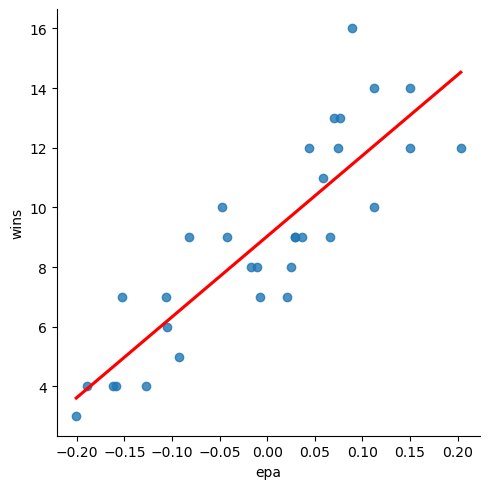

In [9]:
#plot the training data(2021 season data) using lmplot()
sns.lmplot(data=fulldata_2021, x='epa',y='wins',ci=None, line_kws={'color':'red'})


,epa,type,wins
0,-0.103859,wins_actual,4.000000
1,-0.048023,wins_actual,7.000000
2,0.039989,wins_actual,10.000000
3,0.149218,wins_actual,14.000000
4,-0.005689,wins_actual,7.000000
...,...,...,...
59,-0.004385,wins_pred,8.916628
60,0.153862,wins_pred,13.195904
61,-0.056844,wins_pred,7.498037
62,-0.050058,wins_pred,7.681552


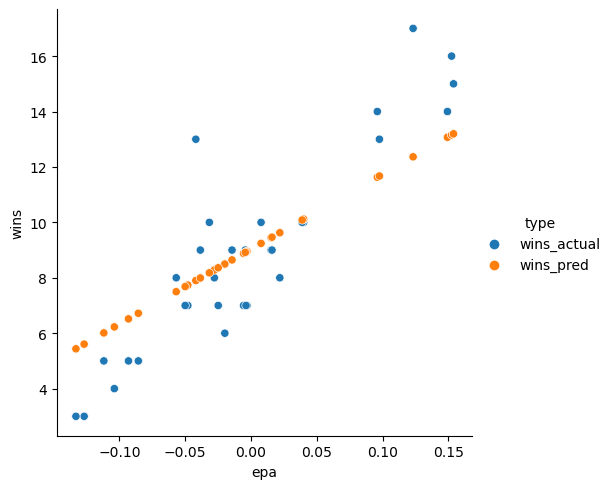

In [10]:
#compare predicted vs actual win totals(2022 season) using relplot()
#melt data
melted = pd.melt(fulldata_2022, id_vars=['epa'],value_vars=['wins_actual','wins_pred'],var_name='type',value_name='wins')
sns.relplot(data=melted,x='epa',y='wins',hue='type' )
melted

In [11]:
#use the score function
nfl_model.score(x_test, y_test)

0.7119774396961972

In [12]:
#Our goal for the score function was 0.75. Unfortunately, the model missed the goal,
#but at least it was pretty close.